In [1]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from collections import Counter
from Chemometrics.basic import psave,pload,train_and_evaluate
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
X = pload('./中汽15个部件各组分浓度.p').fillna(0)
y = pload('./零部件气味等级.p')
entire_car = pload('./整车数据.p')

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression

In [4]:
pipe = Pipeline([('prep',MinMaxScaler()),
                 ('reg',PLSRegression(scale=False))])

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
params = {'reg__n_components':range(1,int(.7*len(y)))}

In [7]:
from sklearn.model_selection import LeaveOneOut

In [8]:
estimator = GridSearchCV(pipe,param_grid=params,cv=LeaveOneOut(),scoring='r2')
estimator.fit(X,y)

GridSearchCV(cv=LeaveOneOut(), error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('prep', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reg', PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg__n_components': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [9]:
from sklearn.metrics import r2_score

In [10]:
r2_score(y,estimator.best_estimator_.predict(X))

0.84272938900475558

In [11]:
import seaborn as sns

In [12]:
y_pred = estimator.best_estimator_.predict(X)

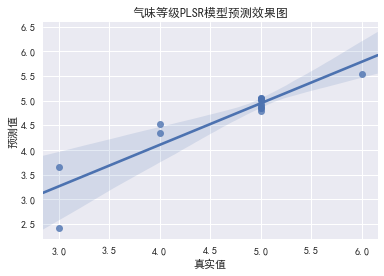

In [13]:
a = sns.regplot(y.values,y_pred.flatten())
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('气味等级PLSR模型预测效果图')